# Bem Vindo à Calculadora de Vigas!
## Feita por Laryssa Ferro e Lucas Silva, leia a seguir como usar:

- Aqui é possivel ver o codigo escrito e os dados que ele gera! 

- É só clicar na celula de interesse e clicar na opcao Run na barra no topo da pagina para entrar com novos dados ou graficos. Clique no quadrado e em Run em todos as celulas, sem pular, para que nada fique para tras!

- Sempre que uma celula gerar uma saida, ela aparecera logo abaixo da celula! Se quiser entrar com um novo dado, clique na mesma celular e em Run novamente, os valores digitados anteriormente serao esquecidos. 

- Nao digite nada dentro da celula, pois ela contem o codigo, todos os dados solicitados de entrada serao pedidos logo abaixo da celula assim que clicar em Run.

- Prefira seguir de forma a descer a página, ou seja, siga a ordem das celulas descendo a pagina!


## As duas celulas a seguir sao apenas para que o codigo funcione no seu computador e seja capazes de computar e gerar gráficos. 

## Clique nela e em Run para carregar as funcionalidades, nao se preocupe nao vai ser baixado nada no seu computador!

In [35]:
!pip install matplotlib
import matplotlib

import numpy as np
import matplotlib.pyplot as plt

def inerciaCalcIy(var, var2, varl):
    H=var-(2*var2)
    b=var2
    a=var2
    Iy= (H*b**3)/12 + (a*varl**3)/6
    return Iy

def cortanteFt(a, b, c, d):
    return (Cortante1(a, b, c, d)*Q)/(inercia*l)

def cortanteFp(a):
    return (Fp*Q)/(inercia*l)

def Cortante1(a, b, c, d): 
    return ReacaoV(b, c, d) - (c*a - (c*a**2)/(2*b))

# permite que se mostre os gráficos nesse ambiente
%matplotlib inline 

## A celula a seguir recebe os dados essenciais da Viga, que segue o modelo abaixo.

## Clique na celula e em Run para inserir os valores, que serao solicitados a seguir embaixo da celula.

![Modelo do Trabalho](viga.jpg)



In [25]:
#recebendo dados

viga = float(input("Digite o comprimento (2) da Viga (m):"))

while viga <= 0:
    print("    O  valor de comprimento nao pode ser 0 ou negativo! Tente novamente")
    viga = float(input("Digite o comprimento (2) da Viga (m):"))

else:
    print("    Comprimento da viga registrado!")

    
Fp = float(input("Digite o valor F2 da carga concentrada (N):"))

while Fp <= 0:
    print("    O  valor de carga nao pode ser 0 ou negativo! Tente novamente")
    Fp = float(input("Digite o valor F2 da carga concentrada (N):"))

else:
    print("    Valor da carga concentrada registrado!")


Fpx = float(input("Digite a posicao (1) da carga concentrada (m):"))

while (Fpx > viga) or (Fpx<0):
    print("    A posicao da carga concentrada nao pode fora da extensao da viga! Tente novamente")
    Fpx = float(input("Digite a posicao (1) da carga concentrada (m):"))

else:
    print("    Posicao da carga concentrada registrada!")
    
Ft = float(input("Digite o valor maximo F1 da carga distribuida (N):"))
while Ft <= 0:
    print("    O  valor de carga nao pode ser 0 ou negativo! Tente novamente")
    Ft = float(input("Digite o valor F1 da carga concentrada (N):"))

else:
    print("    Valor da carga distribuida registrado!")

Ftx = float(input("Digite a posicao final (3) da carga distribuida (m):"))

while (Ftx > viga) or (Ftx<0):
    print("    A posicao final da carga distribuida nao pode fora da extensao da viga! Tente novamente")
    Ftx = float(input("Digite a posicao final (3) da carga distribuida (m):"))

else:
    print("    Posicao da carga distribuida registrada!")
    


Digite o comprimento (2) da Viga (m):5.4
    Comprimento da viga registrado!
Digite o valor F2 da carga concentrada (N):2000
    Valor da carga concentrada registrado!
Digite a posicao (1) da carga concentrada (m):5.4
    Posicao da carga concentrada registrada!
Digite o valor maximo F1 da carga distribuida (N):2000
    Valor da carga distribuida registrado!
Digite a posicao final (3) da carga distribuida (m):3
    Posicao da carga distribuida registrada!


## Com os dados inseridos, é possivel calcular as reacoes de apoio no engaste.
- Clique na celula abaixo e em Run para obter dados!

In [42]:
#calcula reacao do apoio cortante
def ReacaoV(b,h,c):
    return b*h/2 + c

# calcula a reacao de apoio momento
def ReacaoM(a,b,c,d):
    return a*b + c*d

print("A reacao de apoio cortante tem valor(N):", ReacaoV(Ftx, Ft, Fp))

#forca distribuida -> ponto

fmed= (Ft*Ftx)/2
print("O valor equivalente da carga distribuida para um ponto (N):", fmed)

xmed = Ftx/3
print("A posição de aplicação equivalente da carga distribuida (m):", xmed)

print("A reacao de apoio de momento tem valor(N*m):", ReacaoM(fmed,xmed,Fp, Fpx))

A reacao de apoio cortante tem valor(N): 5000.0
O valor equivalente da carga distribuida para um ponto (N): 3000.0
A posição de aplicação equivalente da carga distribuida (m): 1.0
A reacao de apoio de momento tem valor(N*m): 13800.0


## A seguir é possivel gerar o grafico de esforco cortante!

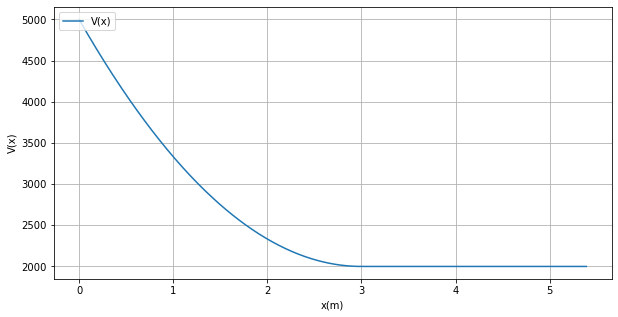

Escolha um valor de x para saber o V(X): 1
3333.333333333333


In [27]:
# Fazendo o gráfico da viga
     # Para fazer os gráficos das funções


x0 = 0              # Valor inicial de x
xf = viga      # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = Cortante1(x, Ftx, Ft, Fp)                         # calcula o vetor de dados y-data

for i in range (0,len(x)):
   if x[i] > Ftx:
      y[i] = Fp

        
largura = 10  # Largura da figura
altura  = 5   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('x(m)')
plt.ylabel('V(x)')
plt.title('')
plt.plot(x, y, label="V(x)")   # Faz o gráfico      
plt.legend(loc="upper left")        # Habilita as legendas
plt.show()

valorV=float(input("Escolha um valor de x para saber o V(X): "))

if (valorV > viga) or (valorV < 0):
    while (valorV > viga) or (valorV < 0):
        print("    A posicao nao pode fora da extensao da viga! Tente novamente")
        valorV = float(input("Escolha um valor de x para saber o V(X):" ))
        
if (valorV < viga) and (valorV < Ftx): 
    print(Cortante1(valorV, Ftx, Ft, Fp))
    
if (valorV>=Ftx) and (valorV< viga):
    print(Fp)
        
elif (valorV==0):
    print(Cortante1(0, Ftx, Ft, Fp))

## A seguir é possivel gerar o grafico de momento!

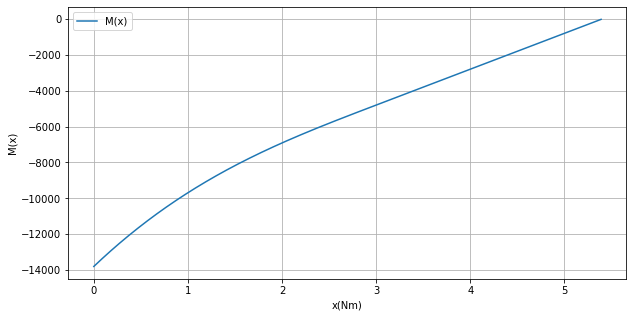

Escolha um valor de x para saber o M(x): 2.3
-6238.11111111111


In [28]:
# Fazendo o gráfico da viga
import numpy as np                  
import matplotlib.pyplot as plt     

def M(a):
    v = ReacaoV(Ftx, Ft, Fp)
    m = ReacaoM(fmed,xmed,Fp,Fpx)
    terc= Ft/(6*Ftx)
    seg= -Ft/2    
    return ( seg*(a**2) + terc*(a**3) + v*a -m)

def M2(b):
    return -((M(Ftx))/(viga-Ftx))*b + (viga*M(Ftx)/(viga-Ftx))   

x0 = 0              # Valor inicial de x
xf = viga            # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = M(x)                         # calcula o vetor de dados y-data

for i in range (0,len(x)):
    if x[i] > Ftx:
      y[i] = -((M(Ftx))/(viga-Ftx))*x[i] + (viga*M(Ftx)/(viga-Ftx))

        
largura = 10  # Largura da figura
altura  = 5   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('x(Nm)')
plt.ylabel('M(x)')
plt.title('')
plt.plot(x, y, label="M(x)")   # Faz o gráfico      
plt.legend(loc="upper left")        # Habilita as legendas
plt.show()

#valor de M(x) em um ponto

valorM=float(input("Escolha um valor de x para saber o M(x): "))

if (valorM==viga):
    print(M2(viga))

if (valorM<=Ftx) and (valorM>0):
    print(M(valorM))
    
if (valorM>Ftx) and (valorM<viga):
    print(M2(valorM))

if (valorM>viga) or (valorM <0):
    while (valorM > viga) or (valorM < 0) :
        print("    A posicao nao pode fora da extensao da viga! Tente novamente")
        valorM = float(input("Escolha um valor de x para saber o M(x):" ))
            
elif (valorM==0):
    print(M(0))

## A celula seguinte serve para escolher a geometria da secao transversal da viga. 


![Tipos de Viga](secoes.png)

## - Digite 1 ou 2 a seguir:

In [29]:
#entradas para tensao

geo=int(input("Escolha uma configuracao de geometria, digitando 1 ou 2: "))

while (geo > 2) or (geo <= 0):
    geo=int(input("    Escolha invalida, digite 1 ou 2: "))

if (geo == 1):
    print("Geometria retangular da secao transversal foi escolhida!")
elif (geo == 2):
        print("Geometria I da secao transversal foi escolhida!")
        
#dimensoes 

h=float(input("Digite a altura h da secao transversal (cm): "))

while h <= 0 :
    h=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))

l=float(input("Digite a largura l da secao transversal (cm): "))

while l <= 0 :
    l=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))
    
if geo==2:
    hlinha=float(input("Digite a altura h' da secao transversal (cm): "))
    while hlinha <= 0 :
        hlinha=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))

teste=2*hlinha        
if (h<=teste):
    while (h<=teste):
        hlinha=float(input("    h nao pode ser menor do que (2h') , digite uma nova entrada (cm): "))
        teste=2*hlinha  
    else: print("       Valores registrados!")
    

Escolha uma configuracao de geometria, digitando 1 ou 2: 2
Geometria I da secao transversal foi escolhida!
Digite a altura h da secao transversal (cm): 0.2
Digite a largura l da secao transversal (cm): 0.2
Digite a altura h' da secao transversal (cm): 0.04


## Finalmente, de acordo com a escolha de secao transversal é possivel gerar o grafico da tensao normal.

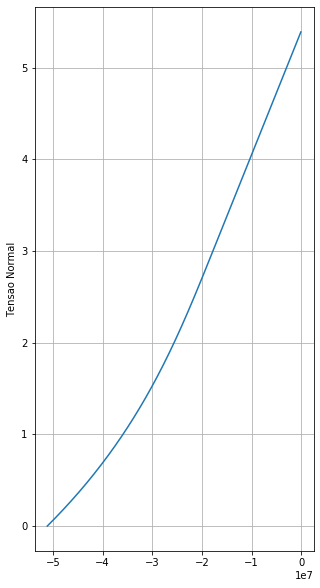

In [30]:
# Fazendo o gráfico da viga
import numpy as np                  
import matplotlib.pyplot as plt     

if geo==1:
    inercia=(h*l*l*l)/12
    Q=h*l**2*0.5
if geo==2:
    inercia=inerciaCalcIy(h, hlinha, l)
    Q=2*inercia/l

def normalFt(a):
    mom=M(a)
    normal=(mom*h)/inercia
    return normal

def normalFp(a):
    mom=M2(a)
    return (mom*h)/inercia

x0 = 0              # Valor inicial de x
xf = viga            # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)


x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = normalFt(x)


for i in range (0,len(x)):
    if x[i] > Ftx:
        y[i] = normalFp(x[i]) 

        
largura = 5  # Largura da figura
altura  = 10   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('')
plt.ylabel('Tensao Normal')
plt.title('')
plt.plot(y,x)   # Faz o gráfico      
plt.show()

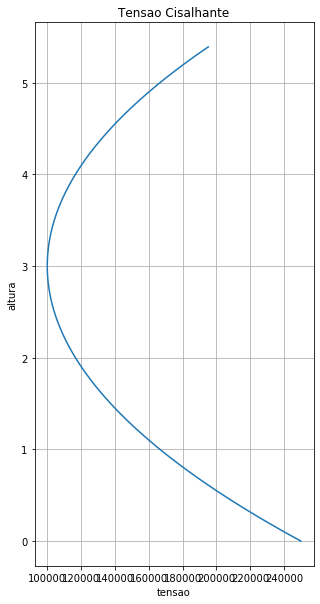

In [36]:
# Fazendo o gráfico da viga
import numpy as np                  
import matplotlib.pyplot as plt     


x0 = 0              # Valor inicial de x
xf = viga            # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = cortanteFt(x, Ftx, Ft, Fp)                         # calcula o vetor de dados y-data

for i in range (0,len(x)):
   if x[i] > Ftx:
      y[i] = cortanteFt(x[i], Ftx, Ft, Fp)

        
largura = 5  # Largura da figura
altura  = 10  # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('tensao')
plt.ylabel('altura')
plt.title('Tensao Cisalhante')
plt.plot(y, x)   # Faz o gráfico      
      # Habilita as legendas

plt.show()

## Por fim, vamos checar se algum limite é ultrapassado. 
## Insira os valores a seguir:

In [41]:
lim=float(input("Digite o valor limite de cisalhamento (Pa): "))
if geo==1:
    inercia=(h*l*l*l)/12
    Q=h*l**2*0.5
if geo==2:
    inercia=inerciaCalcIy(h, hlinha, l)
    Q=2*inercia/l
if (lim<=0):
    while (lim<=0):
        print("    O limite nao pode ser zero ou negativo! Tente novamente")
        valorV = float(input("Digite o valor limite de cisalhamento (Pa): " ))

import numpy as np 
x0 = 0              # Valor inicial de x
xf = viga            # Valor final de x
dx = 0.1            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = (Cortante1(x,Ftx, Ft, Fp)*Q)/(inercia*l)                        # calcula o vetor de dados y-data

for i in range (0,len(x)):
    if y[i] > lim:
        print("O valor limite foi ultrapassado!")
        break

Digite o valor limite de cisalhamento (Pa): 8000
O valor limite foi ultrapassado!
